In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
default=pd.read_csv('default.csv',index_col='ID')
price=pd.read_csv('home_prices_train.csv',index_col='Id')
price=price[['OverallQual','GrLivArea','LotArea','OverallCond','LotFrontage','SalePrice']]
price=price.dropna() ## delete Na data

In [3]:
fea=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
default_x=default[fea]
default_y=default['default payment next month']

In [4]:
fea2=['OverallQual','GrLivArea','LotArea','OverallCond','LotFrontage']
price_x=price[fea2]
price_y=price['SalePrice']

# Problem1

# search for the best parameters for RandomForestClassifier for the default data
# According to precision, the best parameters are {'max_features': 'sqrt', 'n_estimators': 70, 'min_weight_fraction_leaf': 0, 'max_depth': 10}

In [77]:
parameters={'n_estimators':[10,30,50,70],'max_features':[None,'sqrt','log2'],'max_depth':[None,10,20],'min_weight_fraction_leaf':[0,0.2,0.5]}
RFclf=RandomForestClassifier()
scoring = ['precision_macro', 'recall_macro','f1_macro']
for score in scoring:
    clf=GridSearchCV(RFclf,parameters,scoring=score,n_jobs=-1,cv=10)
    clf.fit(default_x,default_y)
    print ('For %s'%score,'the best score is',clf.best_score_)
    print ('The best parameters are',clf.best_params_)
    print '-------------------------------------------------------------------'

('For precision_macro', 'the best score is', 0.76046569444797407)
('The best parameters are', {'max_features': 'sqrt', 'n_estimators': 70, 'min_weight_fraction_leaf': 0, 'max_depth': 10})
-------------------------------------------------------------------
('For recall_macro', 'the best score is', 0.66456506217698819)
('The best parameters are', {'max_features': None, 'n_estimators': 50, 'min_weight_fraction_leaf': 0.2, 'max_depth': None})
-------------------------------------------------------------------
('For f1_macro', 'the best score is', 0.68404690689959435)
('The best parameters are', {'max_features': None, 'n_estimators': 10, 'min_weight_fraction_leaf': 0.2, 'max_depth': 10})
-------------------------------------------------------------------


# search for the best parameters for RandomForestRegressor for the home prices data
# According to mse, the best parameters are {'max_features': 'log2', 'n_estimators': 70, 'min_weight_fraction_leaf': 0, 'max_depth': 10}


In [91]:
parameters={'n_estimators':[10,30,50,70],'max_features':[None,'sqrt','log2'],'max_depth':[None,10,20],'min_weight_fraction_leaf':[0,0.2,0.5]}
RFreg=RandomForestRegressor()
reg=GridSearchCV(RFreg,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)
reg.fit(price_x,price_y)
print ('the best mse is',reg.best_score_)
print ('The best parameters are',reg.best_params_)
print '-------------------------------------------------------------------'

('the best mse is', -1426925176.5308695)
('The best parameters are', {'max_features': 'log2', 'n_estimators': 70, 'min_weight_fraction_leaf': 0, 'max_depth': 10})
-------------------------------------------------------------------


# Problem 2
# For classification for the default data, compared to SVC and logistic regression, RandomForestClassifier is better in precision score, but inferior in recall score. F1 scores are similar among the three classifiers (see graph below)


# For regression for the home price data, compared to SVR and linear regression, RandomForestRegressor has better performance in mse (the smallest) (see graph below

{'linearRegression': 1962997629, 'RandomForest': 1426925177, 'SVR': 5587722463L}
                f1   pre  recall
RandomForest  0.68  0.76    0.66
SVC           0.69  0.68    0.70
logistic      0.69  0.68    0.70


<IPython.core.display.Javascript object>


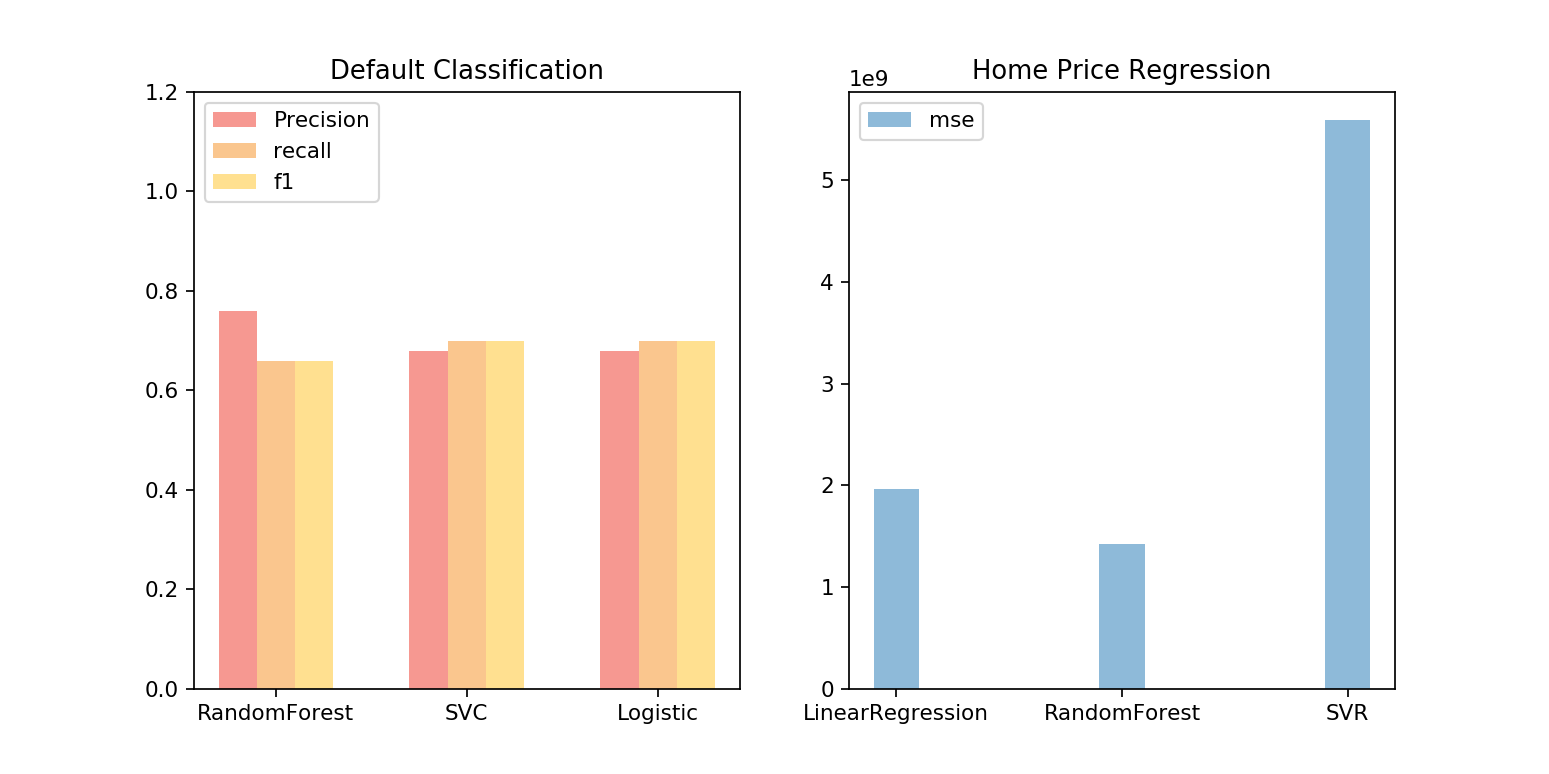

In [34]:
performance={'pre':{'RandomForest':0.76,'SVC':0.68,'logistic':0.68},
'recall':{'RandomForest':0.66,'SVC':0.70,'logistic':0.70},
'f1':{'RandomForest':0.68,'SVC':0.69,'logistic':0.69}}
mse={'RandomForest':1426925177,'SVR':5587722463,'linearRegression':1962997629}
print mse
import matplotlib.pyplot as plt
%matplotlib notebook
from pandas import DataFrame
performance=DataFrame(performance)
print performance
fig= plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)
pos=[0,1,2]
width=0.2
plt.bar(pos,performance['pre'],width,alpha=0.5,color='#EE3224')
plt.bar([p+width for p in pos],performance['recall'],width,alpha=0.5,color='#F78F1E')
plt.bar([p+width*2 for p in pos],performance['recall'],width,alpha=0.5,color='#FFC222')
plt.ylim([0, 1.2])
plt.legend(['Precision', 'recall', 'f1'], loc='upper left')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(['RandomForest','SVC','Logistic'])
ax.set_title('Default Classification')
ax2=fig.add_subplot(1,2,2)
ax2.bar(pos,mse.values(),width,alpha=0.5)
ax2.set_xticks([p for p in pos])
ax2.set_xticklabels(['LinearRegression','RandomForest','SVR'])
ax2.set_title('Home Price Regression')
plt.legend(['mse'], loc='best')

# Svm for the default data

In [5]:
# down sample
default2=default.sample(8000)
default_x2=default2[fea]
default_y2=default2['default payment next month']

# normalization of the x
from sklearn.preprocessing import StandardScaler as SC
sc=SC()
sc.fit(default_x2)
default_x2_std=sc.transform(default_x2)

In [10]:
from sklearn.svm import SVC
param_grid = [
  {'C': [0.1, 1, 10], 'kernel': ['linear']},
  {'C': [0.1, 1, 10], 'gamma': [0.1,1,10,100], 'kernel': ['rbf']},
 ]
svc=SVC(class_weight='balanced') # balance the data
scoring = ['precision_macro', 'recall_macro','f1_macro']
for score in scoring:
    clf=GridSearchCV(svc,param_grid,scoring=score,n_jobs=-1,cv=10)
    clf.fit(default_x2_std,default_y2)
    print ('For %s'%score,'the best score is',clf.best_score_)
    print ('The best parameters are',clf.best_params_)
    print '-------------------------------------------------------------------'

('For precision_macro', 'the best score is', 0.68285747974348143)
('The best parameters are', {'kernel': 'linear', 'C': 1})
-------------------------------------------------------------------
('For recall_macro', 'the best score is', 0.69982085841066077)
('The best parameters are', {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1})
-------------------------------------------------------------------
('For f1_macro', 'the best score is', 0.68523861900130012)
('The best parameters are', {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1})
-------------------------------------------------------------------


# logistic regression for the default data

In [11]:
# normalzization
from sklearn.preprocessing import StandardScaler as SC
sc=SC()
sc.fit(default_x)
default_x_std=sc.transform(default_x)
# logisiticRegression
from sklearn.linear_model import LogisticRegression
parameters={'C':[0.1,1,10],'penalty':['l1','l2'],'fit_intercept':[True,False]}
lr=LogisticRegression(class_weight='balanced') #balance the data
scoring = ['precision_macro', 'recall_macro','f1_macro']
for score in scoring:
    clf=GridSearchCV(lr,parameters,scoring=score,n_jobs=-1,cv=10)
    clf.fit(default_x,default_y)
    print ('For %s'%score,'the best score is',clf.best_score_)
    print ('The best parameters are',clf.best_params_)
    print '-------------------------------------------------------------------'

('For precision_macro', 'the best score is', 0.68174238034365631)
('The best parameters are', {'penalty': 'l2', 'C': 0.1, 'fit_intercept': False})
-------------------------------------------------------------------
('For recall_macro', 'the best score is', 0.69521099976529777)
('The best parameters are', {'penalty': 'l2', 'C': 0.1, 'fit_intercept': False})
-------------------------------------------------------------------
('For f1_macro', 'the best score is', 0.6873273148690543)
('The best parameters are', {'penalty': 'l2', 'C': 0.1, 'fit_intercept': False})
-------------------------------------------------------------------


# SVR for the home price data

In [6]:
len(price) # the home price data set is not too big for the SVR,so there is no need to down sample

1201

In [7]:
# normalization of the x
from sklearn.preprocessing import StandardScaler as SC
sc=SC()
sc.fit(price_x)
price_x_std=sc.transform(price_x)
price_y=price['SalePrice']

In [8]:
from sklearn.svm import SVR
param_grid2 = [
  {'C': [0.1, 1, 10], 'kernel': ['linear'],'epsilon':[0.001,0.01,0.1]},
  {'C': [0.1, 1, 10], 'gamma': [0.1,1,10,100], 'kernel': ['rbf'],'epsilon':[0.001,0.01,0.1]}
 ]
svr=SVR()
reg=GridSearchCV(svr,param_grid2,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)
reg.fit(price_x_std,price_y)
print ('the best mse is',reg.best_score_)
print ('The best parameters are',reg.best_params_)
print '-------------------------------------------------------------------'

('the best mse is', -5587722462.9353552)
('The best parameters are', {'epsilon': 0.1, 'C': 10, 'kernel': 'linear'})
-------------------------------------------------------------------


# Linear Regression for the home price data

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1) #define a regressor
scores=cross_val_score(lr,price_x,price_y,scoring='neg_mean_squared_error',cv=10)
print ('The mse for the linear regression model is',scores.mean()) #use the average score of the 10 runs of the cross validation

('The mse for the linear regression model is', -1962997629.1540954)


# Problem 3

# feature importance for the default data

In [9]:
clf=RandomForestClassifier(n_estimators=70,max_features='sqrt',min_weight_fraction_leaf=0,max_depth=10)
clf.fit(default_x,default_y)
clf.feature_importances_

array([ 0.32512933,  0.13813527,  0.08018234,  0.0681523 ,  0.04789716,
        0.02652388,  0.06794189,  0.05369218,  0.05101554,  0.04956699,
        0.04500137,  0.04676174])

# Pay_6 has the least importance so delete feature PAY_6
# after Pay_6 deleted from the features, the precision score improves(from 0.76 to 0.778) a little but not significant

In [13]:
fea3=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
default_x3=default[fea3]
default_y3=default['default payment next month']
clf.fit(default_x3,default_y3)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print ('precision:',precision_score(default_y3,clf.predict(default_x3)))
print ('recall:',recall_score(default_y3,clf.predict(default_x3)))
print ('f1:',f1_score(default_y3,clf.predict(default_x3)))

('precision:', 0.77762119503945881)
('recall:', 0.41576250753465943)
('f1:', 0.5418303220738413)


# feature importance for the home price data

In [10]:
reg=RandomForestRegressor(max_features='log2',n_estimators=70,min_weight_fraction_leaf=0, max_depth=10)
reg.fit(price_x,price_y)
reg.feature_importances_

array([ 0.46794785,  0.28301107,  0.14434316,  0.02625567,  0.07844225])

In [14]:
fea2

['OverallQual', 'GrLivArea', 'LotArea', 'OverallCond', 'LotFrontage']

# delete OverallCond and LotFrontage because they have the least importance
# after deleting, the mse is improved a lot (from 1426925176 to 405420705)

In [15]:
fea4=['OverallQual', 'GrLivArea', 'LotArea']
price_x3=price[fea4]
price_y3=price['SalePrice']
reg.fit(price_x3,price_y3)
from sklearn.metrics import mean_squared_error as mse
print ('mse:',mse(price_y3,reg.predict(price_x3)))

('mse:', 405420705.67909384)
